# CNN DataAugumentation etc

In [40]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
import os
from keras.models import model_from_json

%matplotlib inline

In [15]:
(cifar_X_1, cifar_y_1), (cifar_X_2, cifar_y_2) = cifar10.load_data()

cifar_X = np.r_[cifar_X_1, cifar_X_2]
cifar_y = np.r_[cifar_y_1, cifar_y_2]

cifar_X = cifar_X.astype('float32') / 255
cifar_y = np.eye(10)[cifar_y.astype('int32').flatten()]

train_X, test_X, train_y, test_y = train_test_split(cifar_X, cifar_y, test_size=10000)
train_X, valid_X, train_y, valid_y = train_test_split(train_X, train_y, test_size=10000)

In [28]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(10, activation='softmax'))

In [29]:
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

## DataAugumentation

In [30]:
# 参考: https://github.com/fchollet/keras/blob/master/examples/cifar10_cnn.py
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

In [31]:
early_stopping = EarlyStopping(patience=0, verbose=1)
history = model.fit_generator(datagen.flow(train_X, train_y, batch_size=100), steps_per_epoch=train_X.shape[0] // 100, epochs=10, validation_data=(test_X, test_y), callbacks=[early_stopping])

Epoch 1/10
400/400 [==============================] - 63s - loss: 1.8167 - acc: 0.3312 - val_loss: 1.4621 - val_acc: 0.4760
Epoch 2/10
400/400 [==============================] - 67s - loss: 1.5276 - acc: 0.4449 - val_loss: 1.2821 - val_acc: 0.5426
Epoch 3/10
400/400 [==============================] - 66s - loss: 1.4097 - acc: 0.4931 - val_loss: 1.2131 - val_acc: 0.5733
Epoch 4/10
400/400 [==============================] - 67s - loss: 1.3309 - acc: 0.5256 - val_loss: 1.0934 - val_acc: 0.6171
Epoch 5/10
400/400 [==============================] - 63s - loss: 1.2700 - acc: 0.5513 - val_loss: 1.0555 - val_acc: 0.6308
Epoch 6/10
400/400 [==============================] - 65s - loss: 1.2308 - acc: 0.5615 - val_loss: 1.0489 - val_acc: 0.6315
Epoch 7/10
400/400 [==============================] - 66s - loss: 1.1999 - acc: 0.5763 - val_loss: 0.9968 - val_acc: 0.6501
Epoch 8/10
400/400 [==============================] - 65s - loss: 1.1676 - acc: 0.5907 - val_loss: 0.9603 - val_acc: 0.6657
Epoch 9/

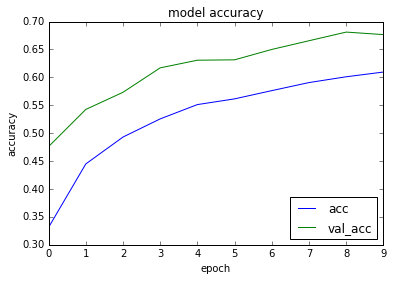

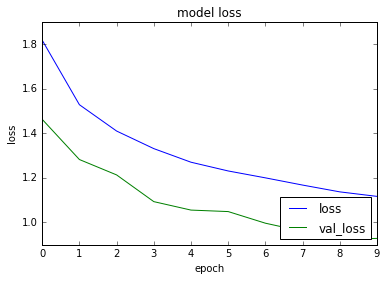

In [33]:
# 参考: http://aidiary.hatenablog.com/entry/20161109/1478696865
def plot_history(history):

    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['acc', 'val_acc'], loc='lower right')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['loss', 'val_loss'], loc='lower right')
    plt.show()

plot_history(history)

## 学習済みモデルの保存

In [38]:
result_dir = './'
model_json = model.to_json()
with open(os.path.join(result_dir, 'model.json'), 'w') as json_file:
    json_file.write(model_json)
model.save_weights(os.path.join(result_dir, 'model.h5'))

## 学習済みモデルの読み込み

In [41]:
model_file = os.path.join(result_dir, 'model.json')
weight_file = os.path.join(result_dir, 'model.h5')

with open(model_file, 'r') as fp:
    model = model_from_json(fp.read())
model.load_weights(weight_file)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               590080    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
__________

# 何か学習済みモデル

- このあたりとか
- https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

In [1]:
from keras.applications.vgg16 import VGG16

Using TensorFlow backend.


In [2]:
model = VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None)

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________